
<img src="https://th.bing.com/th/id/OIP.UALyJPEFAcMOe4IIyDoQbwAAAA?w=192&h=174&c=7&r=0&o=5&dpr=1.5&pid=1.7"  alt="Unable to display picture, please check the network" style="height:90px;" align="right"/>

<!-- <img src=" https://phys100.xmu.edu.cn/2020images/gold100.png"  alt="Unable to display picture, please check the network" style="height:85px;" align="right"/> -->
<hr>
<font face="微软雅黑" size=2><p align="right">院选课 《 <i>机器学习</i> 》 第 九 次作业——翟家辉 (<i>19720212203881</i>) </p></font> 
<hr>

# 

<font face="华文行楷" size=15 ><div align='center'>多层感知机</div></font> 

    
 <font face="华文行楷" size=10 ><div align='center'>(Multi -layer perceptual machine)</div></font> 




---------------------
________________________
<font size=6><div align='center'> **---------------------------目录---------------------------**</div></font>

$\quad$

<font size=5> **&#x2705; 壹 ·  多层感知机**
    
$\quad$
    
<font size=5> **&#x2705; 贰 · 数据预处理——circles数据集**

$\quad$
    
<font size=5> **&#x2705; 叁 · 感知机——多项式**

$\quad$
    
<font size=5> **&#x2705; 肆 · 感知机——核函数**
    
$\quad$
    
<font size=5> **&#x2705; 伍 · 展开项对比**

In [190]:
#常用库及命令

import numpy as np
    # 矩阵运算
import matplotlib.pyplot as plt
    # 绘图
# import ipywidgets as widgets
    # 输入控件
import matplotlib.gridspec as gridspec
    # 自定义图形布局
# import math
    # 数学运算
# import scipy as sc
    # 科学运算及其他
# import sympy as sy
    # 符号计算
# from scipy.optimize import curve_fit
    # 函数拟合
# from scipy.fft import fft,fftfreq
    # 快速FFT变换
# import numba as nb
    # CUDA加速
import time
    # 记录时间
# from scipy.integrate import odeint
    # ODE求解
# from scipy.integrate import solve_ivp
    # 变步长积分
# import matplotlib.animation as animation
    # 动画
from joblib import Parallel, delayed
    # CPU并行加速
from tqdm import tqdm
    # 进度条显示
import pandas as pd
    # 数据读取
# import taichi  
import plotly as py
    # 高级绘图
from plotly.offline import init_notebook_mode, iplot, plot
    # 同上
import plotly.graph_objs as go
    # 同上
import seaborn as sns
    # 绘图
import sklearn
    # 机器学习
import copy
    # 复制
import matplotlib as mpl

# %matplotlib notebook
    # 绘图模式
plt.rcParams['font.sans-serif'] = ['SimHei']
    # 绘图显示中文
plt.rcParams['axes.unicode_minus'] = False
    # 绘图显示负号
    


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-1"></a></span></li><li><span><a href="#一-·-MLP-with-BP" data-toc-modified-id="一-·-MLP-with-BP-2">一 · MLP with BP</a></span><ul class="toc-item"><li><span><a href="#简介" data-toc-modified-id="简介-2.1">简介</a></span></li><li><span><a href="#原理参考" data-toc-modified-id="原理参考-2.2">原理参考</a></span></li><li><span><a href="#其他资料" data-toc-modified-id="其他资料-2.3">其他资料</a></span></li></ul></li><li><span><a href="#二-·-类函数定义" data-toc-modified-id="二-·-类函数定义-3">二 · 类函数定义</a></span><ul class="toc-item"><li><span><a href="#维度信息及默认方法" data-toc-modified-id="维度信息及默认方法-3.1">维度信息及默认方法</a></span></li><li><span><a href="#层信息初始化" data-toc-modified-id="层信息初始化-3.2">层信息初始化</a></span></li><li><span><a href="#前向传播" data-toc-modified-id="前向传播-3.3">前向传播</a></span></li><li><span><a href="#反向传播" data-toc-modified-id="反向传播-3.4">反向传播</a></span></li><li><span><a href="#鸢尾花三分类测试" data-toc-modified-id="鸢尾花三分类测试-3.5">鸢尾花三分类测试</a></span><ul class="toc-item"><li><span><a href="#单隐含层" data-toc-modified-id="单隐含层-3.5.1">单隐含层</a></span></li></ul></li></ul></li><li><span><a href="#三-·-MLP拟合" data-toc-modified-id="三-·-MLP拟合-4">三 · MLP拟合</a></span><ul class="toc-item"><li><span><a href="#神经网络拟合" data-toc-modified-id="神经网络拟合-4.1">神经网络拟合</a></span><ul class="toc-item"><li><span><a href="#数据集划分" data-toc-modified-id="数据集划分-4.1.1">数据集划分</a></span></li><li><span><a href="#BP流程" data-toc-modified-id="BP流程-4.1.2">BP流程</a></span><ul class="toc-item"><li><span><a href="#单隐藏层" data-toc-modified-id="单隐藏层-4.1.2.1">单隐藏层</a></span></li><li><span><a href="#多隐藏层" data-toc-modified-id="多隐藏层-4.1.2.2">多隐藏层</a></span></li><li><span><a href="#大样本" data-toc-modified-id="大样本-4.1.2.3">大样本</a></span></li></ul></li></ul></li><li><span><a href="#总结" data-toc-modified-id="总结-4.2">总结</a></span></li><li><span><a href="#超参数影响" data-toc-modified-id="超参数影响-4.3">超参数影响</a></span><ul class="toc-item"><li><span><a href="#学习率" data-toc-modified-id="学习率-4.3.1">学习率</a></span></li><li><span><a href="#批次数量" data-toc-modified-id="批次数量-4.3.2">批次数量</a></span></li><li><span><a href="#隐含层神经元数" data-toc-modified-id="隐含层神经元数-4.3.3">隐含层神经元数</a></span></li><li><span><a href="#隐含层数" data-toc-modified-id="隐含层数-4.3.4">隐含层数</a></span></li><li><span><a href="#交叉验证" data-toc-modified-id="交叉验证-4.3.5">交叉验证</a></span></li></ul></li></ul></li><li><span><a href="#四-·-MLP分类" data-toc-modified-id="四-·-MLP分类-5">四 · MLP分类</a></span><ul class="toc-item"><li><span><a href="#数据集划分" data-toc-modified-id="数据集划分-5.1">数据集划分</a></span></li><li><span><a href="#类函数" data-toc-modified-id="类函数-5.2">类函数</a></span></li><li><span><a href="#超参数影响" data-toc-modified-id="超参数影响-5.3">超参数影响</a></span><ul class="toc-item"><li><span><a href="#学习率" data-toc-modified-id="学习率-5.3.1">学习率</a></span></li><li><span><a href="#批次数量" data-toc-modified-id="批次数量-5.3.2">批次数量</a></span></li><li><span><a href="#隐含层神经元数" data-toc-modified-id="隐含层神经元数-5.3.3">隐含层神经元数</a></span></li><li><span><a href="#隐含层数" data-toc-modified-id="隐含层数-5.3.4">隐含层数</a></span></li><li><span><a href="#交叉验证" data-toc-modified-id="交叉验证-5.3.5">交叉验证</a></span></li></ul></li></ul></li><li><span><a href="#五-·-比较" data-toc-modified-id="五-·-比较-6">五 · 比较</a></span><ul class="toc-item"><li><span><a href="#线性模型" data-toc-modified-id="线性模型-6.1">线性模型</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-6.2">SVM</a></span></li></ul></li></ul></div>

<span style="color: green;">结论</span>$\qquad$
<span style="color: blue;">引用</span>$\qquad$
<span style="color: red;">问题</span>$\qquad$
<span style="color: yellow;">再出发！</span>

<!-- <div class="alert alert-success">成功！很好地完成了提交。</div>
<div class="alert alert-info">信息！请注意这个信息。</div>
<div class="alert alert-danger">错误！请进行一些更改。</div> 
<div class="alert alert-warning">警告！请不要提交。</div>
-->

---------
--------
# 一 · MLP with BP

## 简介

MLP即**多层感知器**（Multi-Layer Perceptron），它的输入是 $x$ ，输出 $y'$ 是 $h_{W,b}(x)$ ，我们通过调整其参数 $W$ （权重weight）和 $b$ （偏置bias）去拟合已有训练数据 $(x,y)$ 所反映出来的输入输出关系。

**误差反向传播**（Back-propagation, BP）算法的出现是神经网络发展的重大突破，也是现在众多深度学习训练方法的基础。该方法会计算神经网络中损失函数对各参数的梯度，配合优化方法更新参数，降低损失函数。

BP本来只指损失函数对参数的梯度通过网络反向流动的过程，但现在也常被理解成神经网络整个的训练方法，由误差传播、参数更新两个环节循环迭代组成。

## 原理参考

In [1]:
from IPython.display import display
from IPython.display import IFrame
# 打开网页
url = "https://blog.csdn.net/A496608119/article/details/115489420"
width = 900
height = 600

# 在Jupyter Notebook中显示网页预览
display(IFrame(url, width=width, height=height))


## 其他资料

<div class="alert alert-danger">不建议直接执行</div>

In [538]:
#运行以下弹出其他参考标签页
import webbrowser
URL=[
    "https://zhuanlan.zhihu.com/p/188648021"
    ,"https://developer.aliyun.com/article/1110977"
    ,"https://zhuanlan.zhihu.com/p/115571464"
    ,"https://github.com/qcneverrepeat/ML01/blob/master/BP_DNN.ipynb"
    ,"https://www.zhihu.com/question/518729844/answer/2373268636"
    ,"https://zhuanlan.zhihu.com/p/96046514"
    ,"https://zhuanlan.zhihu.com/p/599887970"
    ]
for url in URL:
    print(url)
    webbrowser.open(url)

https://zhuanlan.zhihu.com/p/188648021
https://developer.aliyun.com/article/1110977
https://zhuanlan.zhihu.com/p/115571464
https://github.com/qcneverrepeat/ML01/blob/master/BP_DNN.ipynb
https://www.zhihu.com/question/518729844/answer/2373268636
https://zhuanlan.zhihu.com/p/96046514
https://zhuanlan.zhihu.com/p/599887970


<div class="alert alert-success">珠玉在前，故不再赘述其原理。为保证代码可复用性，在本次作业中将采用类定义和批处理来实现全连接多层感知机的反向传播，let's do it.</div>

---------
--------
# 二 · 类函数定义

<div class="alert alert-success">为了清晰展示多层感知机及其反向传播的全过程，我们将整个MLP分为<strong>输入层(Input_layer)，隐含层(Layer)，输出层(Output_layer)</strong>三部分，分别进行类定义，并采用类方法定义前向传播和反向传播。</div>

<div class="alert alert-warning">值得注意的是，若只考虑数据流在神经网络的传递形式，可只定义两类层，即存在多输出的全连接层 <strong>Layer</strong>，包括输入层(Input_layer)和隐含层(Layer)；和只存在单输出的输出层 <strong>Output_layer</strong>，下面将逐步构建其方法</div>

## 维度信息及默认方法

<div class="alert alert-info"><strong>M</strong> <br>
训练样本的样本个数
</div>

<div class="alert alert-info"><strong>IP (input)</strong> <br>
输入层神经元个数，即输入的训练样本的样本特征数
</div>

<div class="alert alert-info"><strong>OP (output)</strong> <br>
输出层神经元个数，即输出的训练结果，一般为1。
</div>

<div class="alert alert-info"><strong>$\theta_{op}$</strong> <br>
输出层权重参数，数目等同输出层神经元个数
</div>

<div class="alert alert-info"><strong>$L_{num}$</strong> <br>
第 num 层隐含层神经元个数，不包含偏置项
</div>

<div class="alert alert-info"><strong>$W_{num}$</strong> <br>
第 num 层向 num+1 层的传递矩阵，形状 $[L_{num}+1,L_{num+1}]$
</div>

<div class="alert alert-info"><strong>$g(z)$</strong> <br>
激活函数，默认为sigmoid
</div>

<div class="alert alert-info"><strong>$J(\sum \Theta~ OP)$</strong> <br>
损失函数,默认采取MSE
</div>

## 层信息初始化

<div class="alert alert-success">
    在对层进行预定义时，绑定对应的传递矩阵和偏置项，以及作用于其上的激活函数，假定每次迭代处理的样本数m为batch_size
</div>

In [18]:
class Layer(object):
    '''
    全连接层：包括输入层和隐含层
    
    '''
    def __init__(self, input_dim, output_dim, activate='sigmoid'):
        self.input_dim = input_dim #输入数据维数
        self.output_dim = output_dim #输出数据维数
        self.W = np.random.normal(0,0.1,(input_dim, output_dim)) # 随机初始化权重矩阵，分布 N(0,0.01)
        self.b = np.zeros((output_dim,)) # 偏置项b初始化为 0
        self.act = activate
        
    def activate(self, a, grad=False):
        '''
        激活函数
        
        传入矩阵形状 a: (batch_size, output_dim)
        返回矩阵形状 (batch_size, output_dim)
        '''
        if self.act == 'sigmoid':
            h = 1/(1+np.exp(-a))
            if grad is True: #反向传播保留的梯度
                return h*(1-h)
        #保留其他激活函数定义位
            return h
    

In [19]:
class Output_layer(Layer):
    '''
    输出层
    
    '''
    def __init__(self, input_dim, output_dim, activate='softmax'):
        super().__init__(input_dim, output_dim, activate='softmax')#父类继承Layer的相关参数
        
    def activate(self, a):
        '''
        激活函数
        
        传入矩阵形状a: (batch_size, output_dim)
        返回矩阵形状 (batch_size, output_dim)
        
        使用softmax默认使用交叉熵，使用linear默认使用MSE，使得输出层中：𝜕L/𝜕a = y_pred - y_train
            
        '''
        # softmax和linear对应分类/回归任务的输出层
        if self.act == 'softmax':
            h = np.exp(a)/(np.exp(a).sum(axis=1).reshape(a.shape[0],1)) 
            return h
        elif self.act == 'linear':
            return a

## 前向传播

<div class="alert alert-success">
    前向传播的过程较为简单，仅需考虑矩阵相乘顺序与偏置项广播
</div>

In [21]:
class Layer(object):
    '''
    全连接层：包括输入层和隐含层
    
    '''
    ###################################################################################################
    def __init__(self, input_dim, output_dim, activate='sigmoid'):
        self.input_dim = input_dim #输入数据维数
        self.output_dim = output_dim #输出数据维数
        self.W = np.random.normal(0,0.1,(input_dim, output_dim)) # 随机初始化权重矩阵，分布 N(0,0.01)
        self.b = np.zeros((output_dim,)) # 偏置项b初始化为 0
        self.act = activate
        
    def activate(self, a, grad=False):
        '''
        激活函数
        
        传入矩阵形状 a: (batch_size, output_dim)
        返回矩阵形状 (batch_size, output_dim)
        '''
        if self.act == 'sigmoid':
            h = 1/(1+np.exp(-a))
            if grad is True: #反向传播保留的梯度
                return h*(1-h)
            
        elif self.act == 'None': #
            h = a
            if grad is True: #反向传播保留的梯度
                return h
            
        #保留其他激活函数定义位
            return h
    ###################################################################################################
    
    def forward(self, input_data):
        '''
        前向传播
        
        传入矩阵形状: (batch_size, input_dim)
        输出矩阵形状: (batch_size, output_dim)
        
        '''
        self.input_data = input_data #输入矩阵数据
        self.z = np.dot(self.input_data , self.W) + self.b #执行前馈传播，此时self.b执行形状广播操作。
        a = self.activate(self.z) #激活函数作用
        return a

In [22]:
class Output_layer(Layer):
    '''
    输出层
    
    '''
    ###################################################################################################
    def __init__(self, input_dim, output_dim, activate='softmax'):
        super().__init__(input_dim, output_dim, activate='softmax')#父类继承Layer的相关参数
        
    def activate(self, a):
        '''
        激活函数
        
        传入矩阵形状a: (batch_size, output_dim)
        返回矩阵形状 (batch_size, output_dim)
        
        使用softmax默认使用交叉熵，使用linear默认使用MSE，使得输出层中：𝜕L/𝜕a = y_pred - y_train
            
        '''
        # softmax和linear对应分类/回归任务的输出层
        if self.act == 'softmax':
            h = np.exp(a)/(np.exp(a).sum(axis=1).reshape(a.shape[0],1)) 
            return h
        elif self.act == 'linear':
            return a
    ###################################################################################################
    
    '''
    输出层的前向传播继承自全连接层
    
    '''

## 反向传播

<div class="alert alert-success">
    先考虑输出层的反向传播，来自上一层传入数据为a，经过传递权重矩阵W作用后为z，经激活函数作用后为a=g(z)，对于输出层，$\bigtriangleup W_n=\delta_{n+1}*a_n $。将对神经元的更新和对偏置项的更新分开，并设置传递时动态更新。
</div>

In [9]:
class Output_layer(Layer):
    '''
    输出层
    
    '''
    ###################################################################################################
    def __init__(self, input_dim, output_dim, activate):
        super().__init__(input_dim, output_dim, activate) #父类继承Layer的相关参数
        
    def activate(self, z):
        '''
        激活函数
        
        传入矩阵形状a: (batch_size, output_dim)
        返回矩阵形状 (batch_size, output_dim)
        
        使用softmax默认使用交叉熵，使用linear默认使用MSE，使得输出层中：𝜕L/𝜕a = y_pred - y_train
            
        '''
        # softmax和linear对应分类/回归任务的输出层
        if self.act == 'softmax':
            h = np.exp(z)/(np.exp(z).sum(axis=1).reshape(z.shape[0],1)) 

            return h
        
        elif self.act == 'linear':

            return z
    
    '''
    输出层的前向传播继承自全连接层
    
    '''
    def forward(self, input_data):
        '''
        前向传播
        
        传入矩阵形状: (batch_size, input_dim)
        输出矩阵形状: (batch_size, output_dim)
        
        '''
        self.input_data = input_data #输入矩阵数据
        self.z = np.dot(self.input_data , self.W)  #执行前馈传播，此时self.b执行形状广播操作。
        a = self.activate(self.z) #激活函数作用
        return a
    ###################################################################################################
    
    def backward(self, input_grad, lr=0.01):
        '''
        反向传播
        input_grad传入矩阵形状: (batch_size, output_dim)  y_pred-y
        delta输出矩阵形状: (batch_size, input_dim)
        学习率: lr
        self.input_data 层输入矩阵形状(batch_size, input_dim)
    
        求𝜕L/𝜕w=𝜕L/𝜕z * 𝜕z/𝜕w
        z_grad=𝜕L/𝜕z  在输出层为 y_pred-y
        𝜕z/𝜕w=a，即self.input_data
        W_grad=z_grad*input_data
        下一层z_grad=g'* z_grad * w
        记z_grad * w为delta
        
        下层delta=上层delta * w * g`(z) = 上层delta * w * a *(1-a)
        
        '''
        batch_size = input_grad.shape[0]
        z_grad = input_grad          # 𝜕L/𝜕Z 为 y_pred-y (batch_size, output_dim=1)
        b_grad = z_grad.mean(axis=0) # 𝜕L/𝜕b (output_dim=1,)对该批次做平均
        self.b -= lr * b_grad
        
        # 计算𝜕L/𝜕W (input_dim, output_dim)为=𝜕L/𝜕Z * 𝜕Z/𝜕W，下面求𝜕Z/𝜕W 
        # (batch_size, 1, output_dim) * (batch_size, input_dim, 1) = (batch_size, input_dim, output_dim), 在 axis=0 取平均
        W_grad = (z_grad.reshape(batch_size,1,self.output_dim)*self.input_data.reshape(batch_size,self.input_dim,1)).mean(axis=0)
               # z_grad*W(即delta)
        self.W -= lr * W_grad
        delta = input_grad.dot(self.W.T) 

        return delta  
    

In [10]:
class Layer(object):
    '''
    全连接层：包括输入层和隐含层
    
    '''
    ###################################################################################################
    def __init__(self, input_dim, output_dim, activate):
        self.input_dim = input_dim #输入数据维数，即该层神经元数
        self.output_dim = output_dim #输出数据维数，即下层神经元数
        self.W = np.random.normal(0,output_dim/input_dim/10,(input_dim, output_dim)) # 随机初始化权重矩阵，分布 N(0,0.1)
        self.b = np.zeros((output_dim,)) # 偏置项b初始化为 0
        self.act = activate
        
    def activate(self, z, grad=False):
        '''
        激活函数
        
        传入矩阵形状 z: (batch_size, output_dim)
        返回矩阵形状 (batch_size, output_dim)
        '''
        if self.act == 'sigmoid':
            h = 1/(1+np.exp(-z))
            if grad is True: #反向传播保留的梯度
                return h*(1-h)
        #保留其他激活函数定义位
            return h
        elif self.act == 'tanh':
            h = np.tanh(z)
            if grad:
                return 1-h**2
            return h
        elif self.act == 'ReLU':
            h = np.piecewise(z, [z > 0, z <= 0], [lambda x: x, lambda x: 0]) + 0  # +0为了把array(x)转成x
            if grad:
                return np.piecewise(z, [z > 0, z <= 0], [lambda x: 1, lambda x: 0]) + 0 
            return h
        elif self.act == 'linear':
            if grad:
                return z
            return z
    def forward(self, input_data):
        '''
        前向传播
        
        传入矩阵形状: (batch_size, input_dim)
        输出矩阵形状: (batch_size, output_dim)
        
        '''
        self.input_data = input_data #输入矩阵数据
        self.z = np.dot(self.input_data , self.W) + self.b #执行前馈传播，此时self.b执行形状广播操作。
        a = self.activate(self.z) #激活函数作用
        return a
    
    ###################################################################################################
    
    def backward(self, input_grad, lr=0.01):
        '''
        反向传播
        传入矩阵形状:  (batch_size, output_dim)  
        输出矩阵形状: (batch_size, input_dim)     
        '''
        batch_size = input_grad.shape[0]
        z_grad = np.dot(input_grad,self.activate(self.z, grad=True)) # 𝜕L/𝜕Z (batch_size, output_dim)

        b_grad = z_grad.mean(axis=0) # 𝜕L/𝜕b (output_dim,)
        self.b -= lr * b_grad

        # 𝜕L/𝜕W (input_dim, output_dim)
        # (batch_size, 1, output_dim) * (batch_size, input_dim, 1) = (batch_size, input_dim, output_dim), then mean at axis=0
        W_grad = (z_grad.reshape(batch_size,1,self.output_dim)*self.input_data.reshape(batch_size,self.input_dim,1)).mean(axis=0)
        
        self.W -= lr * W_grad
        delta=input_grad.dot(self.W.T)
#         print(W_grad)
        return delta

## 鸢尾花三分类测试

In [168]:
from sklearn import datasets
from keras.utils import to_categorical
iris = datasets.load_iris()
x = iris['data']
y = iris['target']
train_x = np.array((x-x.mean(axis=0))/(x.std(axis=0)))
train_y = np.array(to_categorical(y, num_classes=3))
print("数据集划分")
print(x.shape, train_x.shape, y.shape, train_y.shape)

数据集划分
(150, 4) (150, 4) (150,) (150, 3)


In [169]:
# 3层神经网络：分类
ly1 = Layer(input_dim=4, output_dim=10, activate='sigmoid')
ly2 = Layer(input_dim=10, output_dim=5, activate='sigmoid')
ly3 = Output_layer(input_dim=5, output_dim=3, activate='softmax')

分类精度
0.9666666666666667


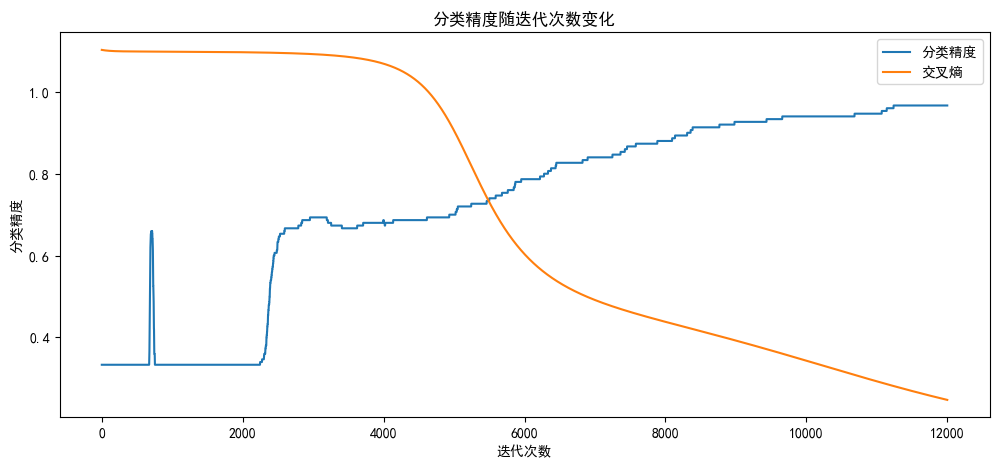

In [170]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error, r2_score

train_acc_set = []
accuracy_set=[]

for i in range(12000):

    f1 = ly1.forward(train_x)
    f2 = ly2.forward(f1)
    y_pred = ly3.forward(f2)
    
    input_grad = y_pred - train_y 

    b3 = ly3.backward(input_grad)
    b2 = ly2.backward(b3)
    b1 = ly1.backward(b2)
    train_acc = (y_pred.argmax(axis=1)==y).sum()/y.size
    train_acc_set.append(train_acc)
    y_true_indicator = label_binarize(train_y, classes=[0, 1, 2])
    accuracy_set.append(log_loss(y_true_indicator, y_pred))
    
plt.figure(figsize=[12, 5])
print("分类精度")
print(train_acc_set[-1])
plt.plot(train_acc_set,label="分类精度")
plt.plot(accuracy_set,label="交叉熵")

plt.xlabel('迭代次数')
plt.ylabel('分类精度')
plt.title('分类精度随迭代次数变化')
plt.legend()
plt.show()

<div class="alert alert-warning">
暂不清楚迭代过程中分类精度的行为成因
</div>

### 单隐含层

In [296]:
# 单隐含层神经网络：分类
ly1 = Layer(input_dim=4, output_dim=40, activate='sigmoid')
# ly2 = Layer(input_dim=10, output_dim=5, activate='sigmoid')
ly3 = Output_layer(input_dim=40, output_dim=3, activate='softmax')

分类精度
0.98


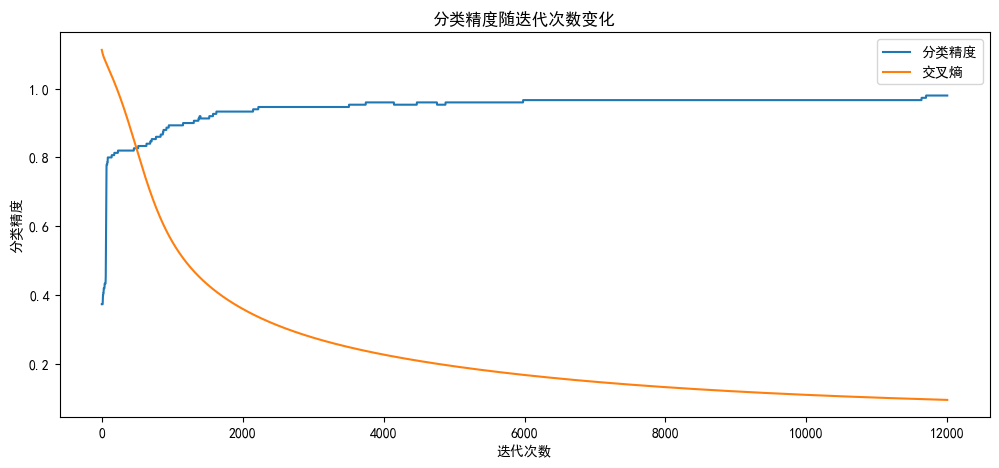

In [175]:
train_acc_set = []
accuracy_set=[]

for i in range(12000):

    f1 = ly1.forward(train_x)
    y_pred = ly3.forward(f1)
    
    input_grad = y_pred - train_y 

    b3 = ly3.backward(input_grad)
    b1 = ly1.backward(b3)
    train_acc = (y_pred.argmax(axis=1)==y).sum()/y.size
    train_acc_set.append(train_acc)
    y_true_indicator = label_binarize(train_y, classes=[0, 1, 2])
    accuracy_set.append(log_loss(y_true_indicator, y_pred))
    
plt.figure(figsize=[12, 5])
print("分类精度")
print(train_acc_set[-1])
plt.plot(train_acc_set,label="分类精度")
plt.plot(accuracy_set,label="交叉熵")

plt.xlabel('迭代次数')
plt.ylabel('分类精度')
plt.title('分类精度随迭代次数变化')
plt.legend()
plt.show()

---------
--------
# 三 · MLP拟合

## 神经网络拟合

### 数据集划分

In [18]:
X=np.random.rand(100)
mu=0.001
Y=np.sin(23*X)+np.random.normal(0,mu,len(X))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X.reshape(len(X),1), Y.reshape(len(Y),1), test_size=0.4, random_state=8452)

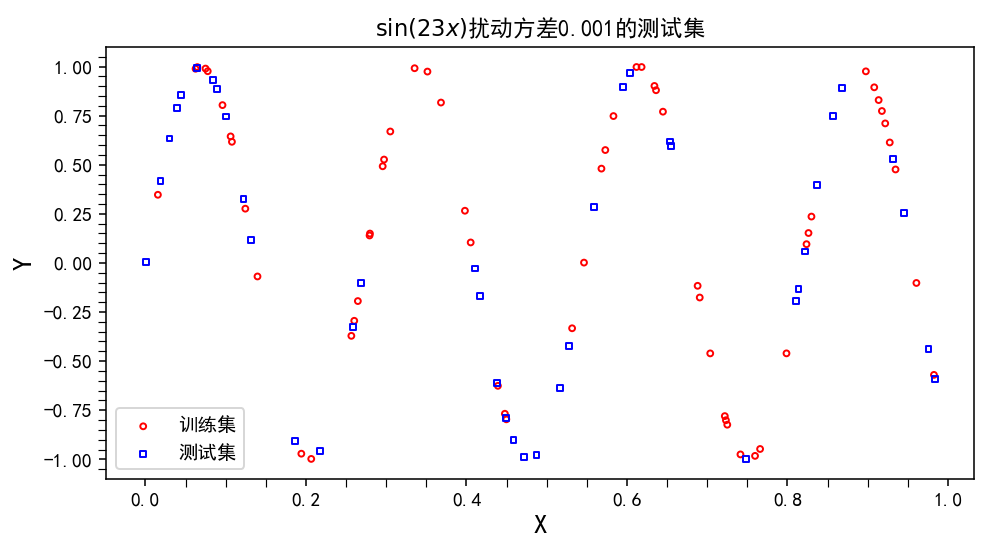

In [19]:
#绘图
plt.figure(figsize=(8,4),dpi=140)
plt.scatter(x_train,y_train,color='none', marker='o',edgecolors="r",label=f"训练集",s=9)
plt.scatter(x_test,y_test,color='none', marker='s',edgecolors="b",label=f"测试集",s=9)
Ls=14
plt.title(f"$\sin(23x)$扰动方差{mu}的测试集",size=Ls/1.2)
plt.ylabel("Y",size=Ls)
plt.xlabel("X",size=Ls)
plt.legend()
plt.minorticks_on()
plt.tick_params(
        axis="x",
    which="minor",
    length=4,)
plt.tick_params(
        axis="y",
    which="minor",
    length=4,)
plt.show()

### BP流程

#### 单隐藏层

In [15]:
# 单隐藏层神经网络，可变参数学习率；批次数量；隐含层神经元数；BP迭代次数;输出层激活函数（拟合/分类）
def one_layer(x_train,y_train,x_test,y_test,
                ax1,ax2,
                lr,batch_size,layer_size,
                label,BP_num=8000,
                op_act='linear',label_num=1):
    layer_size=int(layer_size)
    batch_size=int(batch_size)
    
    ip=Layer(input_dim=x_train.shape[1], output_dim=layer_size,activate='tanh')
#     hp=Layer(input_dim=layer_size, output_dim=layer_size)
    op=Output_layer(input_dim=layer_size,output_dim=label_num,activate=op_act)
    
    accuracy_set=[]
    color_r = (np.random.random(), np.random.random(), np.random.random())
    for i in range(BP_num):
        
        random_indices = np.random.choice(x_train.shape[0], batch_size, replace=False)
        train_x=x_train[random_indices]
        train_y=y_train[random_indices]
        
        #正向
        Forward= ip.forward(train_x)
#         Forward_h=hp.forward(Forward)
        pred_y = op.forward(Forward)

        input_grad = pred_y - train_y 

        #反向
        Backward_1 = op.backward(input_grad)
#         Backward_2 = hp.backward(Backward_1)
        Backward_2 = ip.backward(Backward_1)
        
        #分类or回归
        y_pred=op.forward(ip.forward(x_test))
#         print(i,y_pred,pred_y)
        if op_act=='linear':
            train_acc = mean_squared_error(y_test, y_pred)
            accuracy_set.append(train_acc)
        elif op_act=='softmax':
            y_true_indicator = label_binarize(y_test, classes=[i for i in range(label_num)])
            accuracy_set.append(log_loss(y_true_indicator, y_pred))
            
    t=np.arange(BP_num)
    accuracy_set=np.array(accuracy_set)
    ax1.plot(t,accuracy_set,label="模型训练效果",color=color_r)
    ax1.plot(t,accuracy_set[-1]+t-t,linestyle='dashed',label=f"结果{round(accuracy_set[-1],4)}",color="black")
    
    ax2.scatter(x_train,y_train,color='none', marker='o',edgecolors="r",label=f"训练集",s=9)
    ax2.scatter(x_test,y_test,color='none', marker='s',edgecolors="b",label=f"测试集",s=9)
    t=np.linspace(0,1,1000).reshape(1000,1)
    plot_pred=op.forward(ip.forward(t))
#     print(plot_pred)
    ax2.plot(t,plot_pred,label="训练效果",color=color_r)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.21s/it]


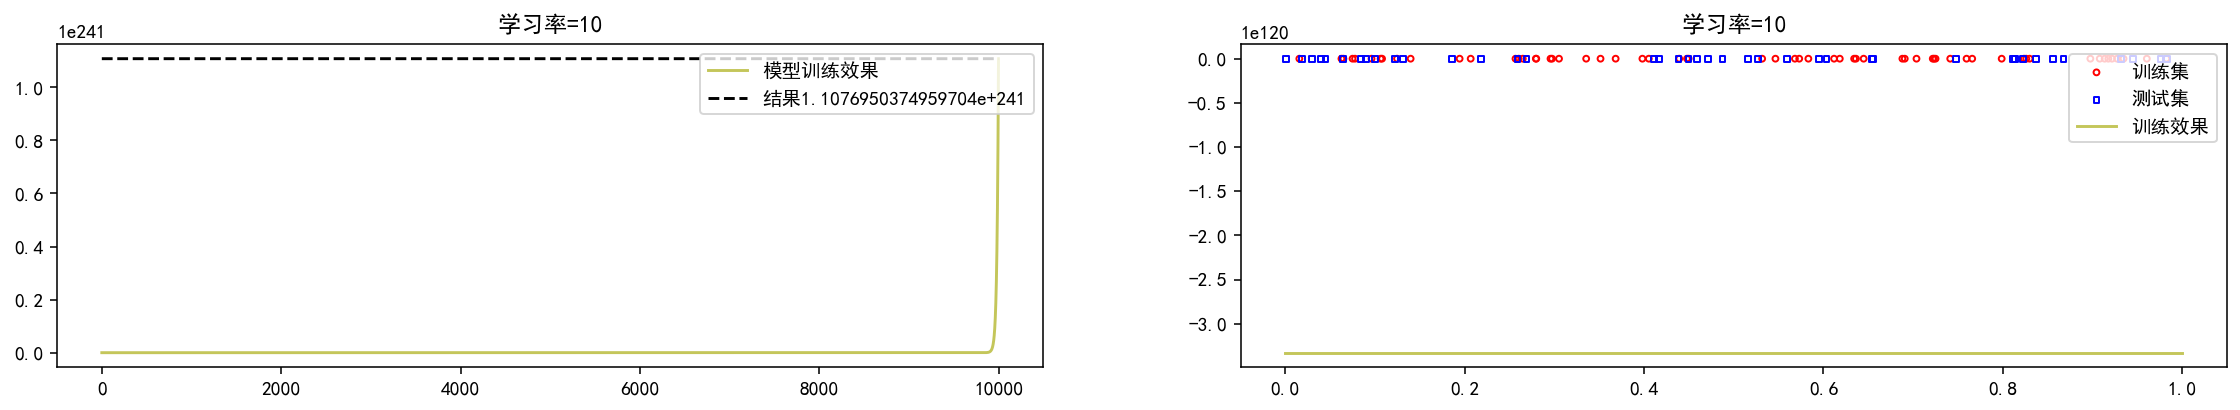

In [29]:
# parameter=[0.001,0.005,0.01,0.05,0.1,0.5,1]
parameter=[10]
parameter_str=[f"学习率={i}" for i in parameter]
N=len(parameter)

plt.figure(figsize=[20, 3],dpi=140)

for i in tqdm(range(N)):
    ax1=plt.subplot(N,2,i+1)
    ax2=plt.subplot(N,2,(i+1)+N)
    one_layer(x_train,y_train,x_test,y_test,
                ax1,ax2,
                parameter[i],40,30,#可变参数学习率；批次数量；隐含层神经元数；
                parameter_str[i],
                10000,'linear')# BP迭代次数
    ax1.legend(loc="upper right")
    ax1.set_title(f"{parameter_str[i]}")
    ax2.legend(loc="upper right")
    ax2.set_title(f"{parameter_str[i]}")
plt.show()

<div class="alert alert-danger">
单隐藏层很难拟合强非线性曲线
</div>

#### 多隐藏层

In [9]:
# 多隐藏层神经网络，可变参数学习率；批次数量；隐含层神经元数；BP迭代次数;输出层激活函数（拟合/分类）
def more_layer(x_train,y_train,x_test,y_test,
                ax1,ax2,
                lr,batch_size,layer_size,
                label,BP_num=8000,
                op_act='linear',label_num=1):
    batch_size=int(batch_size)
    
    ip=Layer(input_dim=x_train.shape[1], output_dim=layer_size[0],activate='tanh')
    Hide_layer=[]
    for i in range(len(layer_size)-1):
        Hide_layer.append(Layer(input_dim=layer_size[i], output_dim=layer_size[i+1],activate='tanh'))
    op=Output_layer(input_dim=layer_size[-1],output_dim=label_num,activate=op_act)
    
    accuracy_set=[]
    color_r = (np.random.random(), np.random.random(), np.random.random())
    for i in range(BP_num):
        
        random_indices = np.random.choice(x_train.shape[0], batch_size, replace=False)
        train_x=x_train[random_indices]
        train_y=y_train[random_indices]
        
        #正向
        Forward_s= ip.forward(train_x)
        Forward_h=Forward_s
        for hp in Hide_layer:
            Forward_h=hp.forward(Forward_h)
        pred_y = op.forward(Forward_h)

        input_grad = pred_y - train_y 

        #反向
        Backward_s = op.backward(input_grad)
        Backward_h=Backward_s
        for hp in reversed(Hide_layer):
            Backward_h=hp.backward(Backward_h)
        Backward_e = ip.backward(Backward_h)
        
        #分类or回归
        Forward_s= ip.forward(x_test)
        Forward_h=Forward_s
        for hp in Hide_layer:
            Forward_h=hp.forward(Forward_h)
        y_pred = op.forward(Forward_h)

#         print(i,y_pred,pred_y)
        if op_act=='linear':
            train_acc = mean_squared_error(y_test, y_pred)
            accuracy_set.append(train_acc)
        elif op_act=='softmax':
            y_true_indicator = label_binarize(y_test, classes=[i for i in range(label_num)])
            accuracy_set.append(log_loss(y_true_indicator, y_pred))
            
    t=np.arange(BP_num)
    accuracy_set=np.array(accuracy_set)
    ax1.plot(t,accuracy_set,label="模型训练效果",color=color_r)
    ax1.plot(t,accuracy_set[-1]+t-t,linestyle='dashed',label=f"结果{round(accuracy_set[-1],4)}",color="black")
    
    ax2.scatter(x_train,y_train,color='none', marker='o',edgecolors="r",label=f"训练集",s=9)
    ax2.scatter(x_test,y_test,color='none', marker='s',edgecolors="b",label=f"测试集",s=9)
    t=np.linspace(0,1,1000).reshape(1000,1)
    
    Forward_s= ip.forward(t)
    Forward_h=Forward_s
    for hp in Hide_layer:
        Forward_h=hp.forward(Forward_h)
    plot_pred = op.forward(Forward_h)

#     print(plot_pred)
    ax2.plot(t,plot_pred,label="训练效果",color=color_r)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:37<00:00, 37.99s/it]


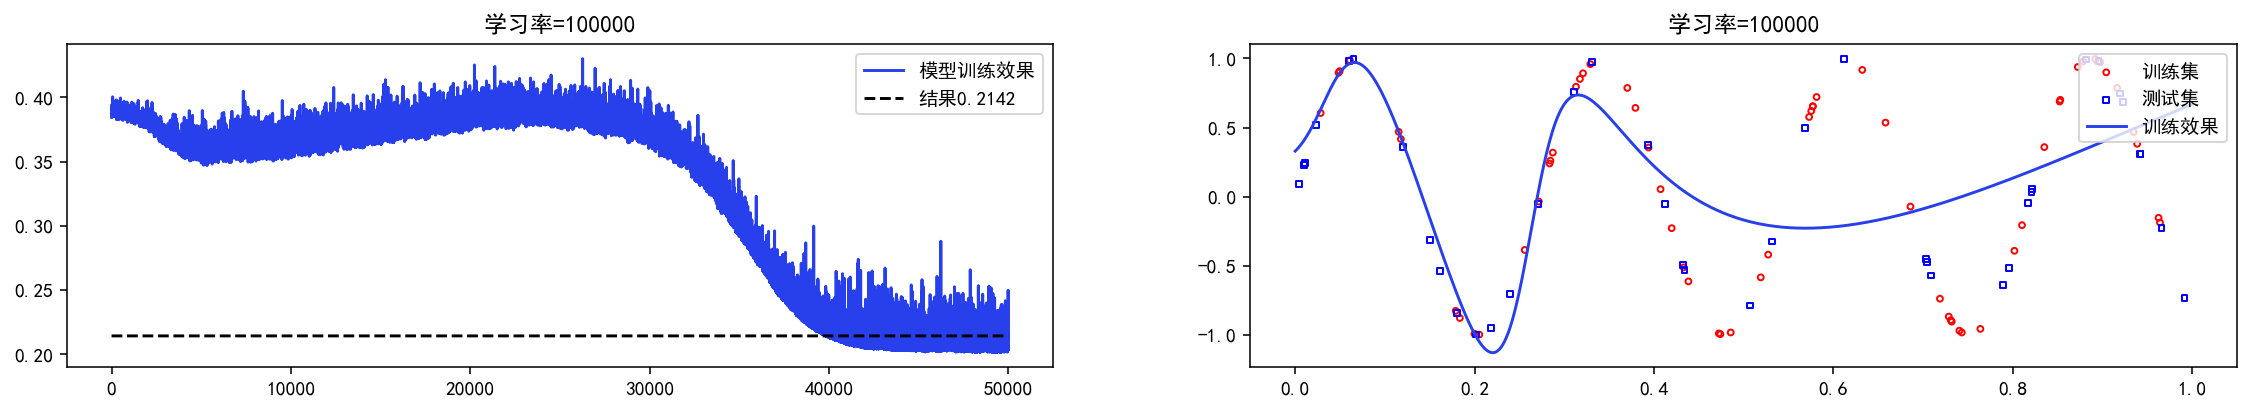

In [580]:
# parameter=[0.001,0.005,0.01,0.05,0.1,0.5,1]
parameter=[100000]
parameter_str=[f"学习率={i}" for i in parameter]
N=len(parameter)

plt.figure(figsize=[20, 3],dpi=140)

for i in tqdm(range(N)):
    ax1=plt.subplot(N,2,i+1)
    ax2=plt.subplot(N,2,(i+1)+N)
    more_layer(x_train,y_train,x_test,y_test,
                ax1,ax2,
                parameter[i],30,[50,50],#可变参数学习率；批次数量；隐含层神经元数；
                parameter_str[i],
                50000,'linear')# BP迭代次数
    ax1.legend(loc="upper right")
    ax1.set_title(f"{parameter_str[i]}")
    ax2.legend(loc="upper right")
    ax2.set_title(f"{parameter_str[i]}")
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [06:11<00:00, 371.91s/it]


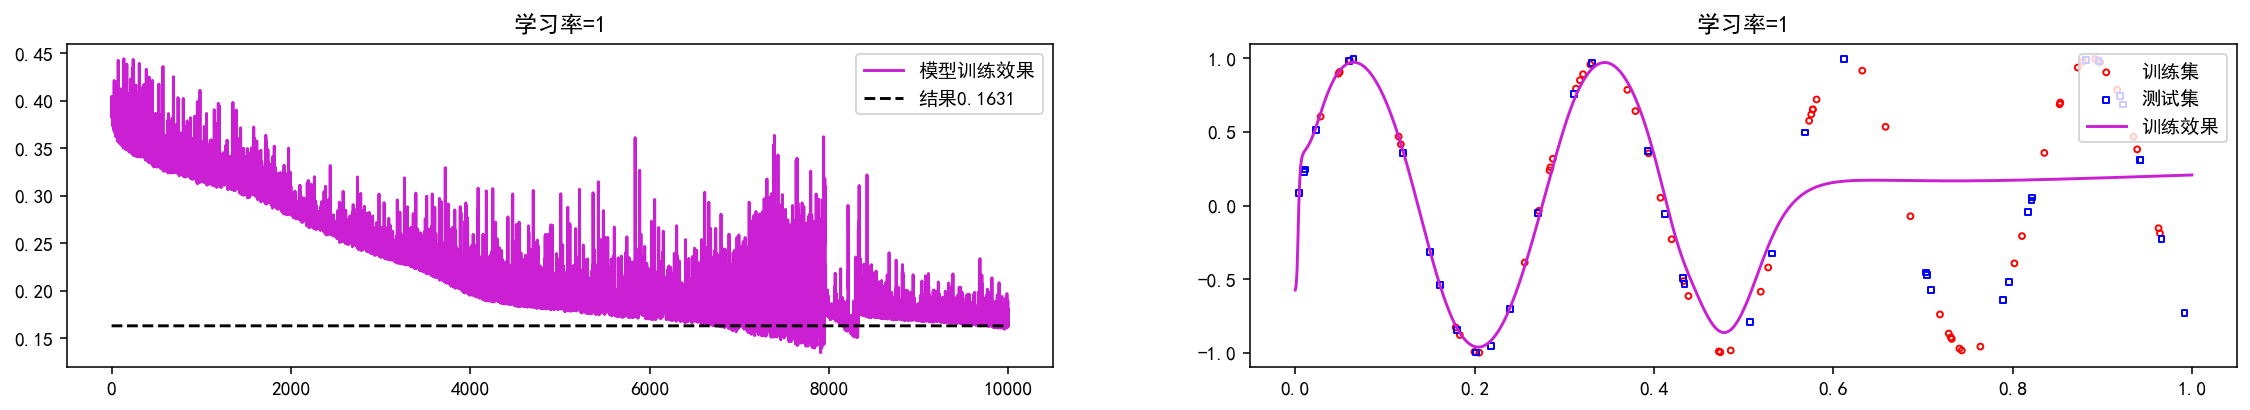

In [583]:
# parameter=[0.001,0.005,0.01,0.05,0.1,0.5,1]
parameter=[1]
parameter_str=[f"学习率={i}" for i in parameter]
N=len(parameter)

plt.figure(figsize=[20, 3],dpi=140)

for i in tqdm(range(N)):
    ax1=plt.subplot(N,2,i+1)
    ax2=plt.subplot(N,2,(i+1)+N)
    more_layer(x_train,y_train,x_test,y_test,
                ax1,ax2,
                parameter[i],30,[300,500,100,200,100,200],#可变参数学习率；批次数量；隐含层神经元数；
                parameter_str[i],
                1000,'linear')# BP迭代次数
    ax1.legend(loc="upper right")
    ax1.set_title(f"{parameter_str[i]}")
    ax2.legend(loc="upper right")
    ax2.set_title(f"{parameter_str[i]}")
plt.show()

#### 大样本

In [596]:
X=np.random.rand(1000)
mu=0.001
Y=np.sin(23*X)+np.random.normal(0,mu,len(X))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X.reshape(len(X),1), Y.reshape(len(Y),1), test_size=0.4, random_state=8452)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:02<00:00, 62.02s/it]


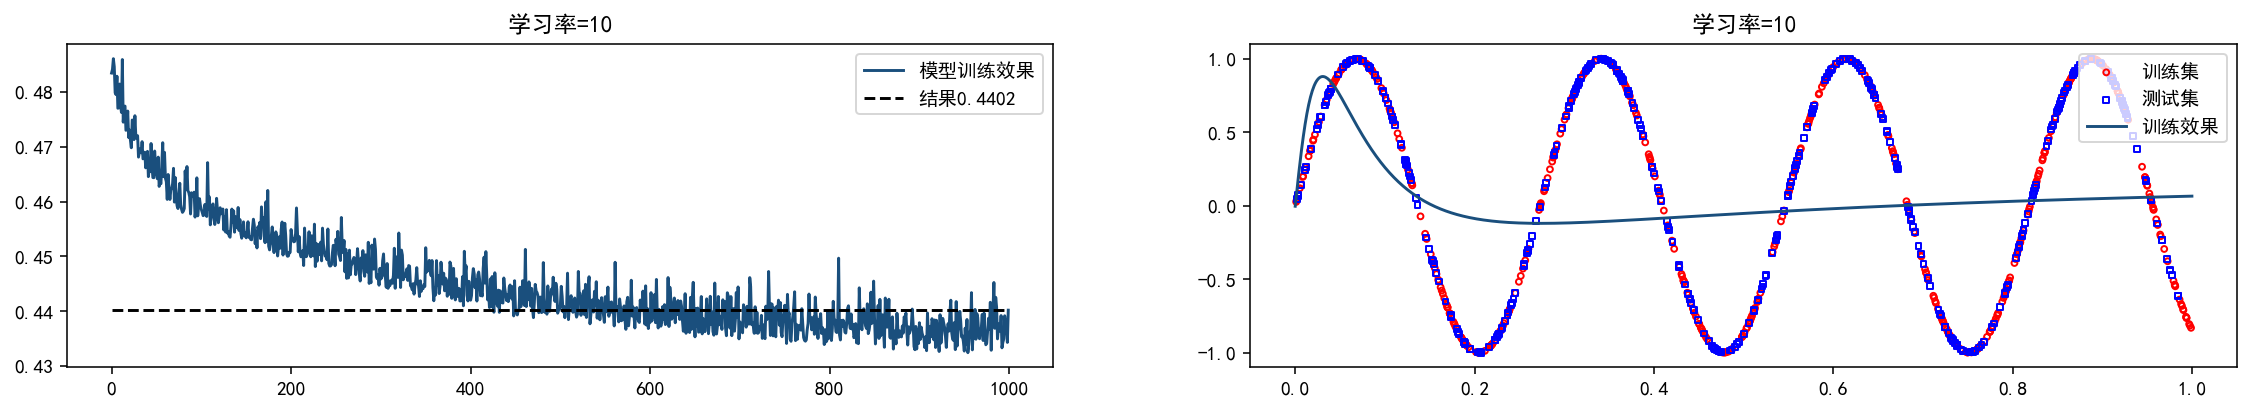

In [604]:
# parameter=[0.001,0.005,0.01,0.05,0.1,0.5,1]
parameter=[10]
parameter_str=[f"学习率={i}" for i in parameter]
N=len(parameter)

plt.figure(figsize=[20, 3],dpi=140)

for i in tqdm(range(N)):
    ax1=plt.subplot(N,2,i+1)
    ax2=plt.subplot(N,2,(i+1)+N)
    more_layer(x_train,y_train,x_test,y_test,
                ax1,ax2,
                parameter[i],400,[200,200],#可变参数学习率；批次数量；隐含层神经元数；
                parameter_str[i],
                1000,'linear')# BP迭代次数
    ax1.legend(loc="upper right")
    ax1.set_title(f"{parameter_str[i]}")
    ax2.legend(loc="upper right")
    ax2.set_title(f"{parameter_str[i]}")
plt.show()

## 总结

 <div class="alert alert-success">引入MLP,拟合强非线性函数需要很大的BP次数</div>

<div class="alert alert-danger">
由于第迭代次数下拟合效果不佳，下列因素暂未讨论
</div>

## 超参数影响

### 学习率

### 批次数量

### 隐含层神经元数

### 隐含层数

### 交叉验证

---------
--------
# 四 · MLP分类

## 数据集划分

In [191]:
from sklearn.datasets import make_moons,make_circles
data=make_moons(n_samples=400,noise=0.15,random_state=4)
data=make_circles(n_samples=400,noise=0.01,random_state=4)
Data = pd.DataFrame(data[0], columns=['X', 'Y'])
Data['Label'] = data[1]

In [192]:
from sklearn.model_selection import train_test_split

Y=Data['Label']
X=Data[['X',"Y"]]
# 以7:3比例分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


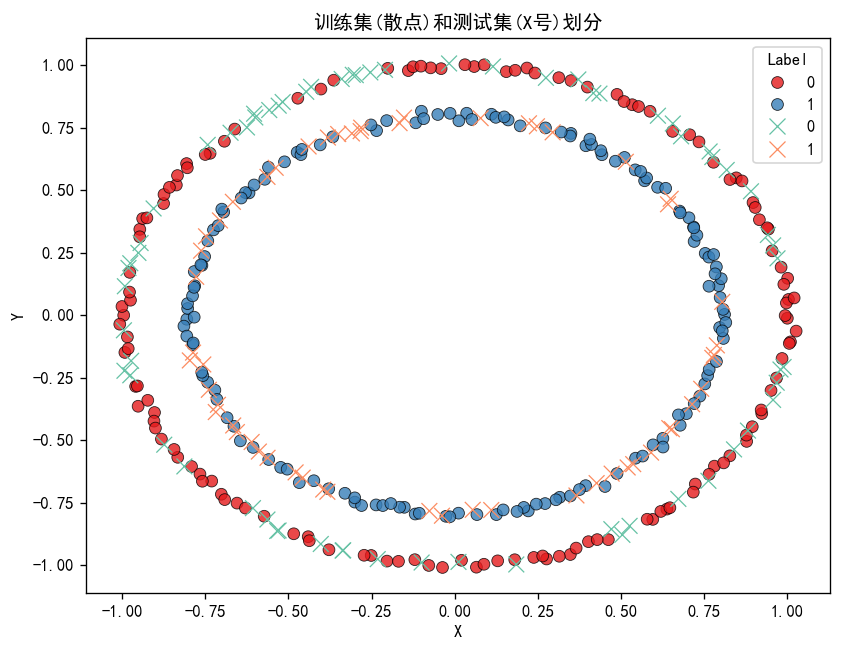

In [193]:
fig, ax = plt.subplots(figsize=(8, 6),dpi=120)
sns.scatterplot(x='X', y='Y', hue=y_train, data=X_train, ax=ax,marker='o', s=50, alpha=0.8, edgecolor='black', linewidth=0.5, palette='Set1')
sns.scatterplot(x='X', y='Y', hue=y_test, data=X_test, ax=ax,marker='x', s=90,palette='Set2')

ax.set_title("训练集(散点)和测试集(X号)划分")
plt.show()
x_train=np.array(X_train).astype(float)
y_train=np.array(y_train).astype(float).reshape(len(y_train),1)
x_test=np.array(X_test).astype(float)
y_test=np.array(y_test).astype(float).reshape(len(y_test),1)

## 类函数

In [194]:
input_data=np.random.random([2,1])

In [195]:
B=np.ones((input_data.shape[0],1))

In [196]:
np.concatenate((B,input_data),axis=1)

array([[1.        , 0.06498702],
       [1.        , 0.97238367]])

In [197]:
np.insert(input_data,0,values=1,axis=1)

array([[1.        , 0.06498702],
       [1.        , 0.97238367]])

In [198]:
class Layer(object):
    '''
    全连接层：包括输入层和隐含层
    
    '''
    ###################################################################################################
    def __init__(self, input_dim, output_dim, activate):
        self.input_dim = input_dim #输入数据维数，即该层神经元数
        self.output_dim = output_dim #输出数据维数，即下层神经元数
        self.W = np.random.normal(0,1,(input_dim+1, output_dim)) # 随机初始化权重矩阵，分布 N(0,0.1)
        self.b = self.W*0.1 # 偏置项b初始化为 1
        self.act = activate
        
    def activate(self, z, grad=False):
        '''
        激活函数
        
        传入矩阵形状 z: (batch_size, output_dim)
        返回矩阵形状 (batch_size, output_dim)
        '''
        if self.act == 'sigmoid':
            h = 1/(1+np.exp(-z))
            if grad is True: #反向传播保留的梯度
                h= z*(1-z)
        #保留其他激活函数定义位
            return h
        elif self.act == 'tanh':
            h = np.tanh(z)
            if grad:
                return 1-h**2
            return h
        elif self.act == 'ReLU':
            h = np.piecewise(z, [z > 0, z <= 0], [lambda x: x, lambda x: 0]) + 0  # +0为了把array(x)转成x
            if grad:
                return np.piecewise(z, [z > 0, z <= 0], [lambda x: 1, lambda x: 0]) + 0 
            return h
        elif self.act == 'linear':
            if grad:
                return z
            return z
    def forward(self, input_data):
        '''
        前向传播
        
        传入矩阵形状: (batch_size, input_dim)
        输出矩阵形状: (batch_size, output_dim)
        
        '''
        self.input_data = input_data #输入矩阵数据
#         B=np.ones((self.input_data.shape[0],1))
#         self.b=np.concatenate((B,self.input_data),axis=1)
        self.b=np.insert(self.input_data,0,values=1,axis=1)
        self.z = np.dot(self.b,self.W)#执行前馈传播，此时self.b执行形状广播操作。
        self.a = self.activate(self.z) #激活函数作用
        return self.a
    
    ###################################################################################################
    
    def backward(self, input_grad, lr=0.01):
        '''
        反向传播
        传入矩阵形状:  (batch_size, output_dim)  
        输出矩阵形状: (batch_size, input_dim)     
        '''
        batch_size = input_grad.shape[0]
        z_grad = input_grad
        a_grad=self.activate(self.a, grad=True)
#         print(a_grad.shape,self.a.shape)
        W_grad = np.dot(self.b.T,z_grad*a_grad)
        delta = np.dot(input_grad,self.W[1:,:].T)
        self.W -= lr * W_grad/batch_size

#         delta = np.dot(input_grad,self.W[1:].T)*a_grad
#         print(W_grad)
        return delta

In [199]:
class Output_layer(Layer):
    '''
    输出层
    
    '''
    ###################################################################################################
    def __init__(self, input_dim, output_dim, activate):
        super().__init__(input_dim, output_dim, activate) #父类继承Layer的相关参数
        
    def activate(self, z):
        '''
        激活函数
        
        传入矩阵形状a: (batch_size, output_dim)
        返回矩阵形状 (batch_size, output_dim)
        
        使用softmax默认使用交叉熵，使用linear默认使用MSE，使得输出层中：𝜕L/𝜕a = y_pred - y_train
            
        '''
        # softmax和linear对应分类/回归任务的输出层
        if self.act == 'softmax':
            h = np.exp(z)/(np.exp(z).sum(axis=1).reshape(z.shape[0],1)) 
#             h = 1/(1+np.exp(-z))

            return h
        
        elif self.act == 'linear':
            return z
    
    '''
    输出层的前向传播继承自全连接层
    
    '''
    def forward(self, input_data):
        '''
        前向传播
        
        传入矩阵形状: (batch_size, input_dim)
        输出矩阵形状: (batch_size, output_dim)
        
        '''
        self.input_data = input_data #输入矩阵数据
#         B=np.ones((self.input_data.shape[0],1))
#         self.b=np.concatenate((B,self.input_data),axis=1)
        self.b=np.insert(self.input_data,0,values=1,axis=1)
        self.z = np.dot(self.b,self.W)#执行前馈传播，此时self.b执行形状广播操作。
        self.a = self.activate(self.z) #激活函数作用
        return self.a
    ###################################################################################################
    
    def backward(self, input_grad, lr=0.01):
        '''
        反向传播
        input_grad传入矩阵形状: (batch_size, output_dim)  y_pred-y
        delta输出矩阵形状: (batch_size, input_dim)
        学习率: lr
        self.input_data 层输入矩阵形状(batch_size, input_dim)
    
        求𝜕L/𝜕w=𝜕L/𝜕z * 𝜕z/𝜕w
        z_grad=𝜕L/𝜕z  在输出层为 y_pred-y
        𝜕z/𝜕w=a，即self.input_data
        W_grad=z_grad*input_data
        下一层z_grad=g'* z_grad * w
        记z_grad * w为delta
        
        下层delta=上层delta * w * g`(z) = 上层delta * w * a *(1-a)
        
        '''
        batch_size = input_grad.shape[0]
        z_grad = input_grad
        a_grad=1
        W_grad = np.dot(self.b.T,z_grad)
        delta = np.dot(z_grad,self.W[1:,:].T)*a_grad
        self.W -= lr * W_grad/batch_size
        
        return delta  
    

In [200]:
for i in range(0):
    print(1)

In [201]:
# 多隐藏层神经网络，可变参数学习率；批次数量；隐含层神经元数；BP迭代次数;输出层激活函数（拟合/分类）
def more_layer(x_train,y_train,x_test,y_test,
                ax1,ax2,
                lr,batch_size,layer_size,
                label,BP_num=8000,
                op_act='softmax',label_num=1):
    batch_size=int(batch_size)
    
    ip=Layer(input_dim=x_train.shape[1], output_dim=layer_size[0],activate='ReLU')
    Hide_layer=[]

    for i in range(len(layer_size)-1):
        Hide_layer.append(Layer(input_dim=layer_size[i], output_dim=layer_size[i+1],activate='ReLU '))
        
    op=Output_layer(input_dim=layer_size[-1],output_dim=label_num,activate=op_act)
    
    accuracy_set=[]
    train_set=[]
    color_r = (np.random.random(), np.random.random(), np.random.random())
    for i in range(BP_num):
        
        random_indices = np.random.choice(x_train.shape[0], batch_size, replace=False)
        train_x=x_train[random_indices]
        train_y=y_train[random_indices]
        
        #正向
        Forward_s= ip.forward(train_x)
        Forward_h=Forward_s
        for hp in Hide_layer:
            Forward_h=hp.forward(Forward_h)
        pred_y = op.forward(Forward_h)

        input_grad = pred_y - train_y 

        #反向
        Backward_s = op.backward(input_grad)
        Backward_h=Backward_s
        for hp in reversed(Hide_layer):
            Backward_h=hp.backward(Backward_h)
        Backward_e = ip.backward(Backward_h)
        
        #分类or回归
        Forward_s= ip.forward(x_test)
        Forward_h=Forward_s
        for hp in Hide_layer:
            Forward_h=hp.forward(Forward_h)
        y_pred = op.forward(Forward_h)

#         print(i,y_pred,pred_y)
        if op_act=='linear':
            train_acc = mean_squared_error(y_test, y_pred)
            accuracy_set.append(train_acc)
            train_acc = mean_squared_error(train_y, pred_y)
            train_set.append(train_acc)
        elif op_act=='softmax':
            y_true_indicator = label_binarize(y_test, classes=[i for i in range(label_num)])
            accuracy_set.append(log_loss(y_true_indicator, y_pred))
            y_indicator = label_binarize(train_y, classes=[i for i in range(label_num)])
            train_set.append(log_loss(y_indicator, pred_y))
            
    t=np.arange(BP_num)
    accuracy_set=np.array(accuracy_set)
    ax1.plot(t,train_set,label="模型训练效果",color="r")
    ax1.plot(t,accuracy_set,label="模型泛化效果",color=color_r,linewidth=5)
    ax1.plot(t,accuracy_set[-1]+t-t,linestyle='dashed',label=f"结果{round(accuracy_set[-1],4)}",color="black")
    
    ax2.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='vlag', marker='o', edgecolors="none", label="训练集", s=9)
    ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='vlag',marker='x',label=f"测试集",s=9)
    x = np.linspace(-1.2, 2, 300)
    y = np.linspace(-1.2, 1.4, 300)

    X, Y = np.meshgrid(x, y)
    
    t = np.column_stack((X.ravel(), Y.ravel()))
    Forward_s = ip.forward(t)
    Forward_h = Forward_s
    for hp in Hide_layer:
        Forward_h = hp.forward(Forward_h)
    plot_pred = op.forward(Forward_h)
    plot_pred_array = np.array(plot_pred)

    indices = np.where(np.abs(plot_pred_array[:,0] - plot_pred_array[:, 1]) <= 0.0001)

    X_plot = t[indices][:,0]
    Y_plot = t[indices][:,1]
    ax2.scatter(X_plot, Y_plot, c="black", label="训练效果",s=0.1)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


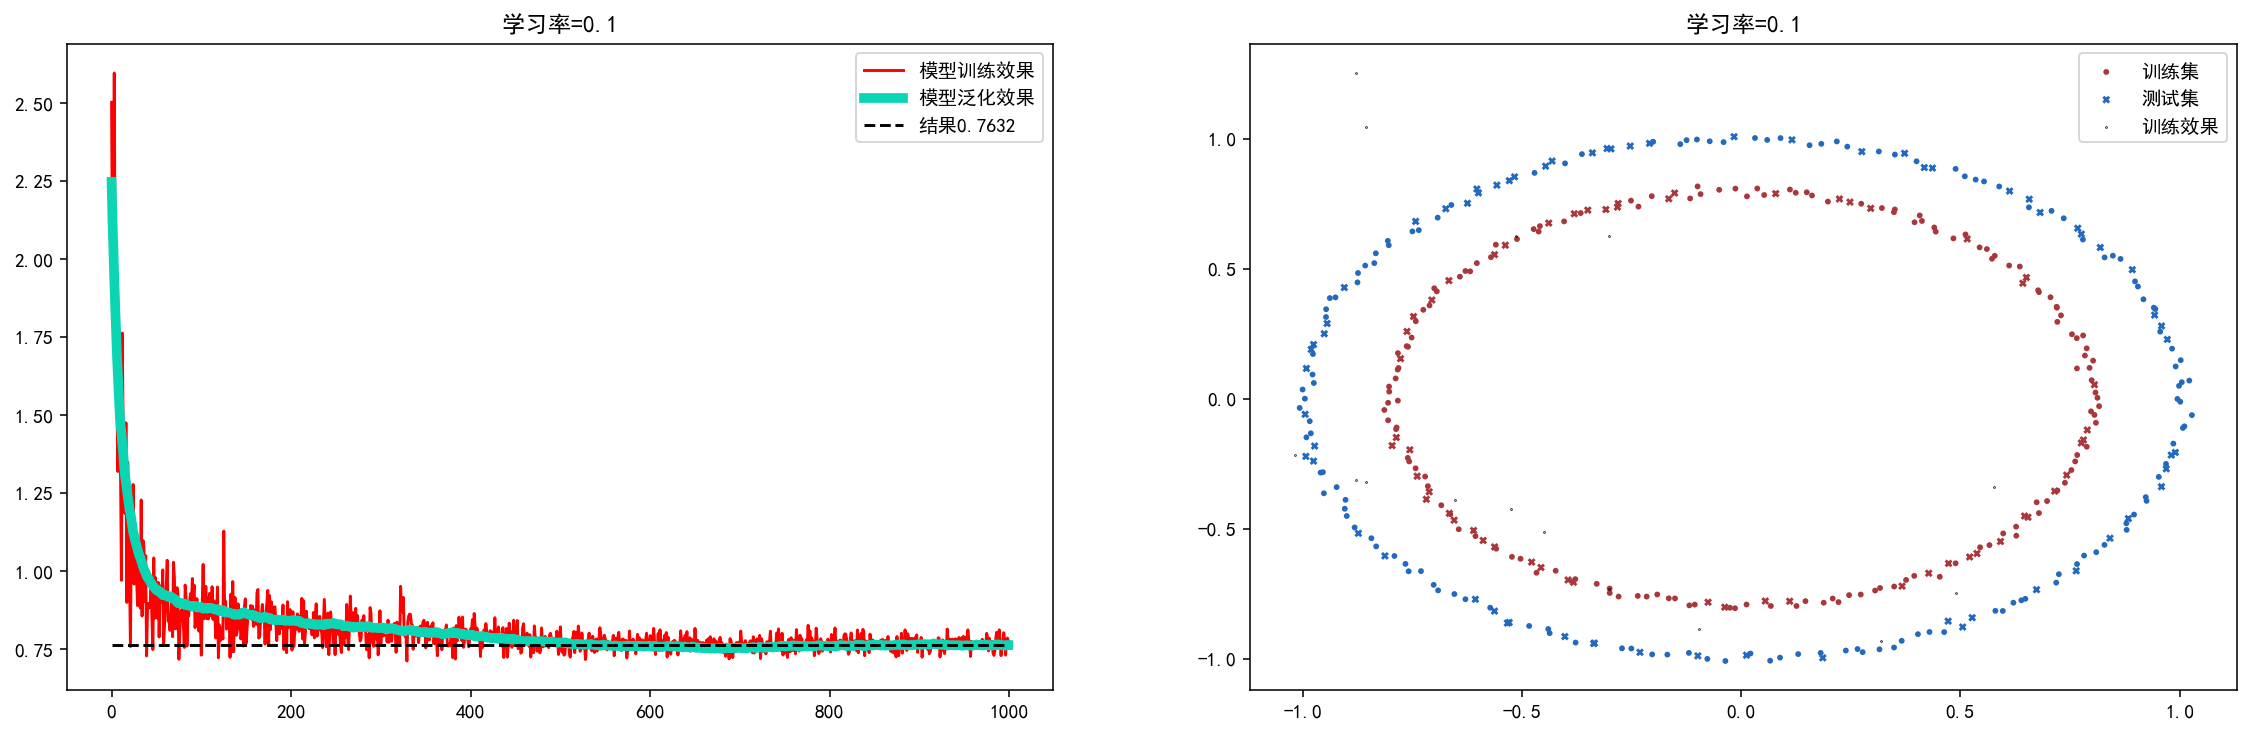

In [202]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error, r2_score

parameter=[0.1]
parameter_str=[f"学习率={i}" for i in parameter]
N=len(parameter)

plt.figure(figsize=[20, 6],dpi=140)

for i in tqdm(range(N)):
    ax1=plt.subplot(N,2,i+1)
    ax2=plt.subplot(N,2,(i+1)+N)
    more_layer(x_train,y_train,x_test,y_test,
                ax1,ax2,
                parameter[i],40,[40],#可变参数学习率；批次数量；隐含层神经元数；
                parameter_str[i],
                1000,'softmax',label_num=2)# BP迭代次数
    ax1.legend(loc="upper right")
    ax1.set_title(f"{parameter_str[i]}")
    ax2.legend(loc="upper right")
    ax2.set_title(f"{parameter_str[i]}")
    
plt.show()

<div class="alert alert-danger">
由于低迭代次数下拟合效果不佳，分类均为直线。故下列因素暂未讨论
</div>

## 超参数影响

### 学习率

### 批次数量

### 隐含层神经元数

### 隐含层数

### 交叉验证

---------
--------
# 五 · 比较

## 线性模型

多层感知机（Multilayer Perceptron, MLP）和线性模型是机器学习中常见的两种模型，它们在模型结构和能力上存在一些显著的差异。

线性模型是一种简单而常用的模型，其基本形式是通过线性组合来建模输入特征与输出之间的关系。线性模型的预测结果是输入特征的加权和，通过一个线性函数进行变换。线性模型可以用于回归问题和二分类问题，也可以通过一些扩展用于多分类问题。线性模型具有解释性强、计算效率高等优点，但其表达能力有限，不能很好地处理非线性关系。

多层感知机是一种基于人工神经网络的模型，通过多个神经网络层的组合来实现非线性建模。多层感知机由输入层、隐藏层和输出层组成，其中隐藏层可以有多个。每个神经元通过激活函数将输入信号加权求和并进行非线性变换。多层感知机具有较强的非线性建模能力，能够学习复杂的特征和模式，适用于各种机器学习任务。但多层感知机的模型结构复杂，训练和调整参数需要更多的计算资源和时间。

比较多层感知机和线性模型的一些方面：

表达能力: 多层感知机具有较强的非线性建模能力，能够捕捉输入特征的复杂关系，而线性模型只能建模线性关系。

模型复杂度: 多层感知机相对于线性模型来说更加复杂，有更多的参数需要训练和调整。

解释性: 线性模型通常具有较好的解释性，可以解释每个特征对输出的影响程度，而多层感知机由于其复杂的结构，解释性较差。

计算效率: 线性模型的计算效率较高，训练和预测速度快，而多层感知机由于其复杂的结构，计算开销较大。

数据需求: 多层感知机通常需要更多的数据样本来进行训练，以避免过拟合，而线性模型对于较小的数据集也能表现良好。

综上所述，选择使用多层感知机还是线性模型取决于具体的问题和数据集特征。如果数据集中存在复杂的非线性关系，多层感知机可能更适合。如果问题相对简单且解释性较重要，线性模型可能是一个更好的选择。在实践中，通常会根据具体情况进行模型选择和比较，甚至尝试结合两者的优势，构建更复杂的模型。

## SVM

支持向量机是一种监督学习模型，用于进行二分类和多分类任务。SVM的目标是找到一个超平面，将不同类别的样本分隔开，并最大化分类边界与最近样本之间的间隔。SVM可以通过不同的核函数来处理非线性问题，将输入样本映射到高维特征空间进行分割。支持向量机具有较好的泛化能力和解释性，对于小样本和高维数据集也表现良好。但在处理大规模数据集时，SVM的计算开销较大。

比较多层感知机和支持向量机的一些方面：

非线性建模能力: 多层感知机具有较强的非线性建模能力，能够学习复杂的特征和模式，而支持向量机通过核函数可以处理非线性问题，但相对于多层感知机的非线性建模能力较弱。

模型复杂度: 多层感知机相对于支持向量机来说更加复杂，有更多的参数需要训练和调整，而支持向量机的模型相对简单。

计算效率: 支持向量机在训练和预测时的计算效率通常较高，尤其在处理小规模数据集时表现良好，而多层感知机由于其复杂的结构，计算开销较大。

解释性: 支持向量机具有较好的解释性，可以通过支持向量来解释分类决策边界，而多层感知机由于其复杂的结构，解释性较差。

数据需求: 多层感知机通常需要更多的数据样本来进行训练，以避免过拟合，而支持向量机对于小样本数据集也能表现良好。